# Section 2: Data Analysis and Visualization

In [35]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [36]:
houses = pd.read_csv(r"C:\Users\Imogen\Downloads\houses_postprocessing.csv")
houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,No,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,No,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2.0,1.00,770.0,10000.0,1.0,No,No,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,No,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,No,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20473,360000.0,3.0,2.50,1530.0,1131.0,3.0,No,No,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
20474,400000.0,4.0,2.50,2310.0,5813.0,2.0,No,No,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
20475,402101.0,2.0,0.75,1020.0,1350.0,2.0,No,No,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
20476,400000.0,3.0,2.50,1600.0,2388.0,2.0,No,No,3,8,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


## Identify categorical, ordinal, and numerical variables

Start by checking the pandas data type.

In [37]:
categorical = houses.select_dtypes(include=['object', 'category']).columns
categorical

Index(['waterfront', 'view'], dtype='object')

In [38]:
numerical = houses.select_dtypes(include=['int64', 'float64']).columns
numerical

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year_sold', 'month_sold'],
      dtype='object')

Checking for categorical and numerical data is providing incorrect information, as some columns are being treated as numerical when they should be categorical, such as 'zipcode'. The columns with years and months will be considered categorical for this analysis, as we will likely be grouping by year and month, rather than using them for calculations. The 'condition' column should be ordinal, as this is a ranked number list. 

In [39]:
# Rule to make the data we know should be categorical to that type
force_categorical = ['zipcode', 'yr_built', 'yr_renovated', 'year_sold', 'month_sold']

# Separate ordinal data
ordinal_cols = ['condition']

# Separate numeric data
numeric_cols = houses.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in force_categorical + ordinal_cols]

# Separate truly categorical data
categorical_cols = list(categorical.union(force_categorical))

print("Numeric -", ', '.join(numeric_cols))
print("Categorical -", ', '.join(categorical_cols))
print("Ordinal -", ', '.join(ordinal_cols))

Numeric - price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, grade, sqft_above, sqft_basement, lat, long, sqft_living15, sqft_lot15
Categorical - month_sold, view, waterfront, year_sold, yr_built, yr_renovated, zipcode
Ordinal - condition


## Measures of centrality and distribution

Summary statistic for numeric data:

In [40]:
numeric_summary = houses[numeric_cols].describe()
numeric_summary

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.047800e+04,20478.000000,20478.000000,20478.000000,2.047800e+04,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000,20478.000000
mean,5.403971e+05,3.371374,2.119946,2074.889345,1.481613e+04,1.493896,7.657291,1790.594931,290.786112,47.560079,-122.213882,1986.781570,12739.683319
std,3.681934e+05,0.907412,0.750061,896.150333,4.085610e+04,0.538376,1.176076,829.952522,441.685369,0.138357,0.140836,685.743423,27256.576211
min,7.500000e+04,0.000000,0.000000,370.000000,5.200000e+02,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,659.000000
25%,3.220500e+05,3.000000,1.750000,1450.000000,5.150000e+03,1.000000,7.000000,1200.000000,0.000000,47.471300,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,47.571750,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2510.000000,1.041550e+04,2.000000,8.000000,2219.250000,560.000000,47.677900,-122.125000,2360.000000,10080.000000
max,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.500000,13.000000,8860.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


In [41]:
for col in numeric_cols:
    mode_numeric = houses[col].mode()[0]
    print(f'Mode of {col}: {mode_numeric}')

Mode of price: 350000.0
Mode of bedrooms: 3.0
Mode of bathrooms: 2.5
Mode of sqft_living: 1920.0
Mode of sqft_lot: 7620.0
Mode of floors: 1.0
Mode of grade: 7
Mode of sqft_above: 1300
Mode of sqft_basement: 0
Mode of lat: 47.5491
Mode of long: -122.29
Mode of sqft_living15: 1540
Mode of sqft_lot15: 5000


<function matplotlib.pyplot.show(close=None, block=None)>

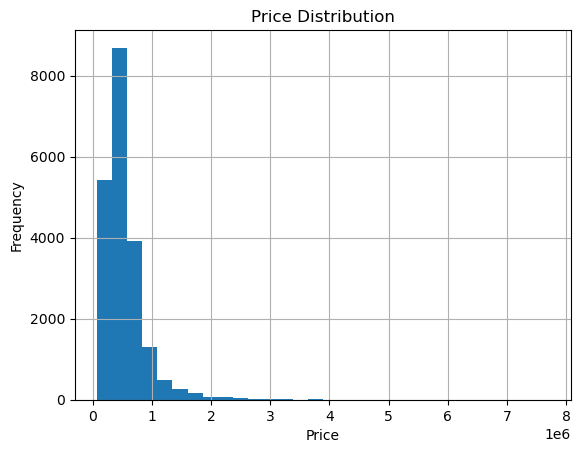

In [42]:
# Remove scientific notation from histogram
houses['price'].hist(bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show

The histogram is heavily right=sweked, indicating that there are a few very expensive outliers in the dataset. The majority of home are under $1M, with the typical price of $350,000.

<function matplotlib.pyplot.show(close=None, block=None)>

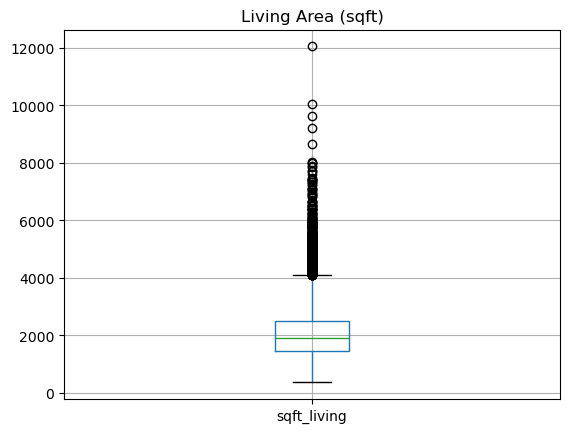

In [43]:
houses[['sqft_living']].boxplot()
plt.title('Living Area (sqft)')
plt.show

Similar to the price histogram, the boxplot of the living area is heavily right-skewed with lots of large outliers. The majority of sold houses have less than 3000 square feet of living area. These two variables are likely to have the highest correlation, hence why they were chosen for visualization. 

Summary statistics for categorical data:

In [44]:
def categorical_summary(df, column):
    print(f'Analysis for column: {column}\n')

    # Removing 0 values since they were heavily skewing only the yr_renovated column 
    if column == 'yr_renovated':
        df_filtered = df[df[column] != 0]
    else:
        df_filtered = df
    
    freq = df_filtered[column].value_counts()
    print('Frequency counts:')
    print(freq)
    
    mode_categorical = df_filtered[column].mode()
    print(f'Mode: {mode_categorical.tolist()}')
    print()
    
    count_unique = df_filtered[column].nunique()
    print(f'Unique categories: {count_unique}\n')

    freq.sort_values(ascending=True).plot(kind='barh', figsize=(8, max(4, len(freq)/3)))
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

Analysis for column: month_sold

Frequency counts:
month_sold
5     2283
4     2114
7     2097
6     2068
8     1853
3     1771
10    1764
9     1685
12    1392
11    1336
2     1187
1      928
Name: count, dtype: int64
Mode: [5]

Unique categories: 12



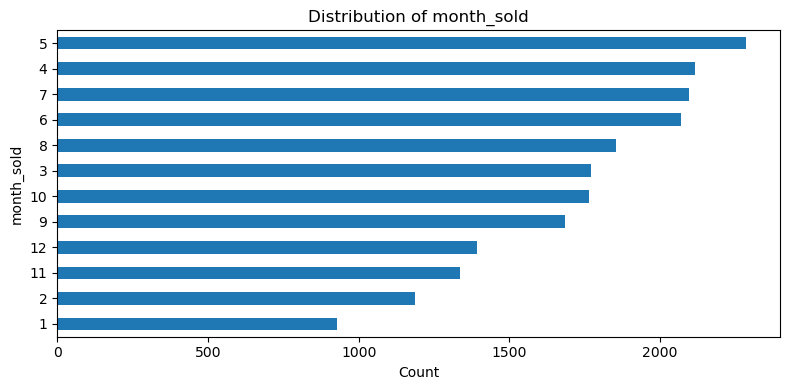

Analysis for column: view

Frequency counts:
view
No     18464
Yes      316
Name: count, dtype: int64
Mode: ['No']

Unique categories: 2



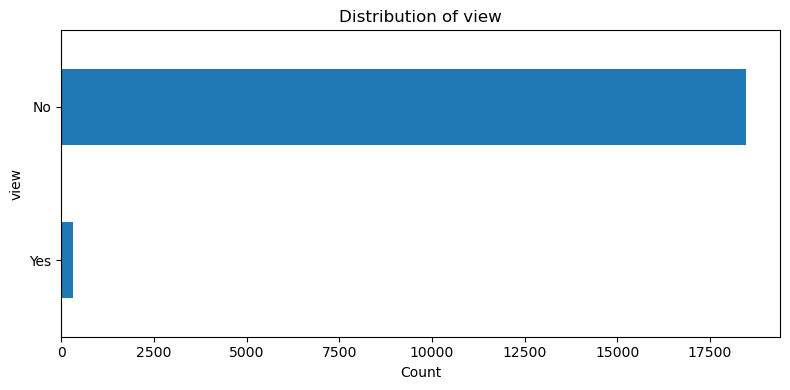

Analysis for column: waterfront

Frequency counts:
waterfront
No     20327
Yes      151
Name: count, dtype: int64
Mode: ['No']

Unique categories: 2



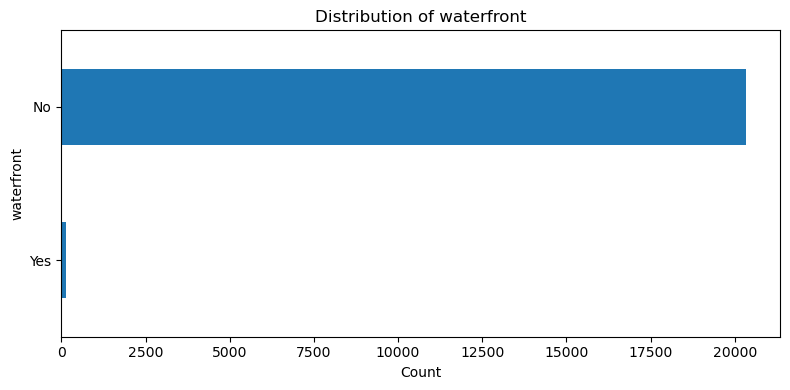

Analysis for column: year_sold

Frequency counts:
year_sold
2014    13868
2015     6610
Name: count, dtype: int64
Mode: [2014]

Unique categories: 2



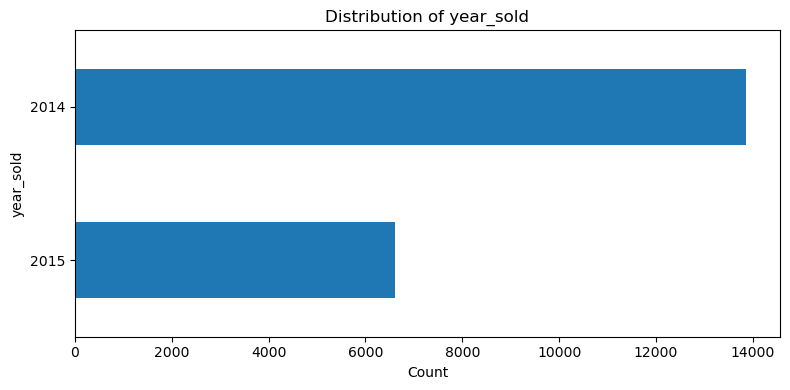

Analysis for column: yr_built

Frequency counts:
yr_built
2014    523
2006    430
2005    423
2004    408
2003    402
       ... 
1933     30
1901     28
1902     26
1935     23
1934     20
Name: count, Length: 116, dtype: int64
Mode: [2014]

Unique categories: 116



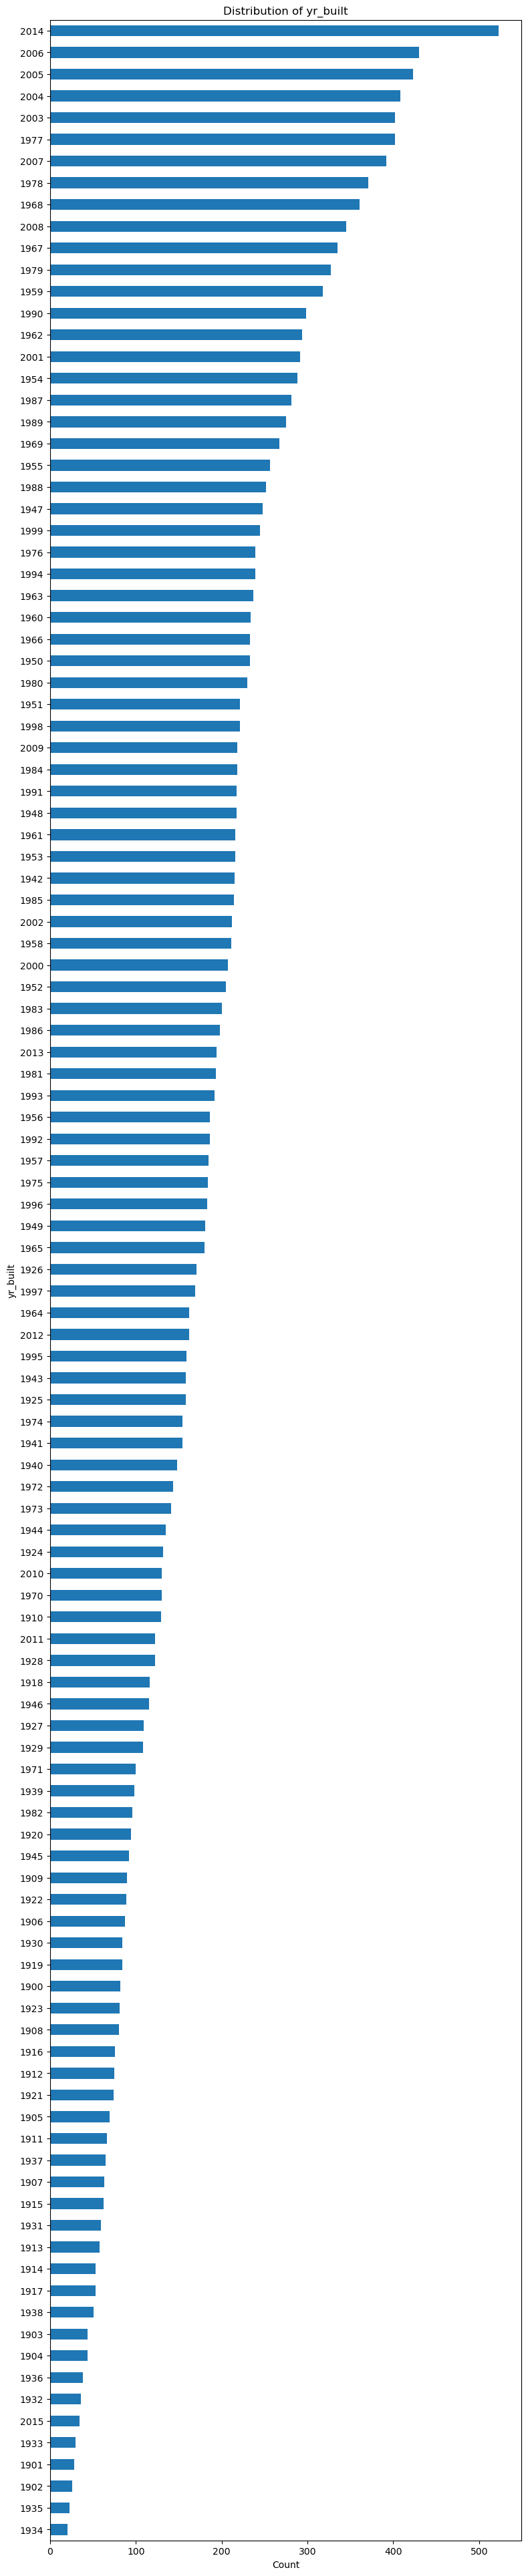

Analysis for column: yr_renovated

Frequency counts:
yr_renovated
2014    86
2013    37
2003    36
2005    34
2007    33
        ..
1948     1
1959     1
1954     1
1934     1
1944     1
Name: count, Length: 69, dtype: int64
Mode: [2014]

Unique categories: 69



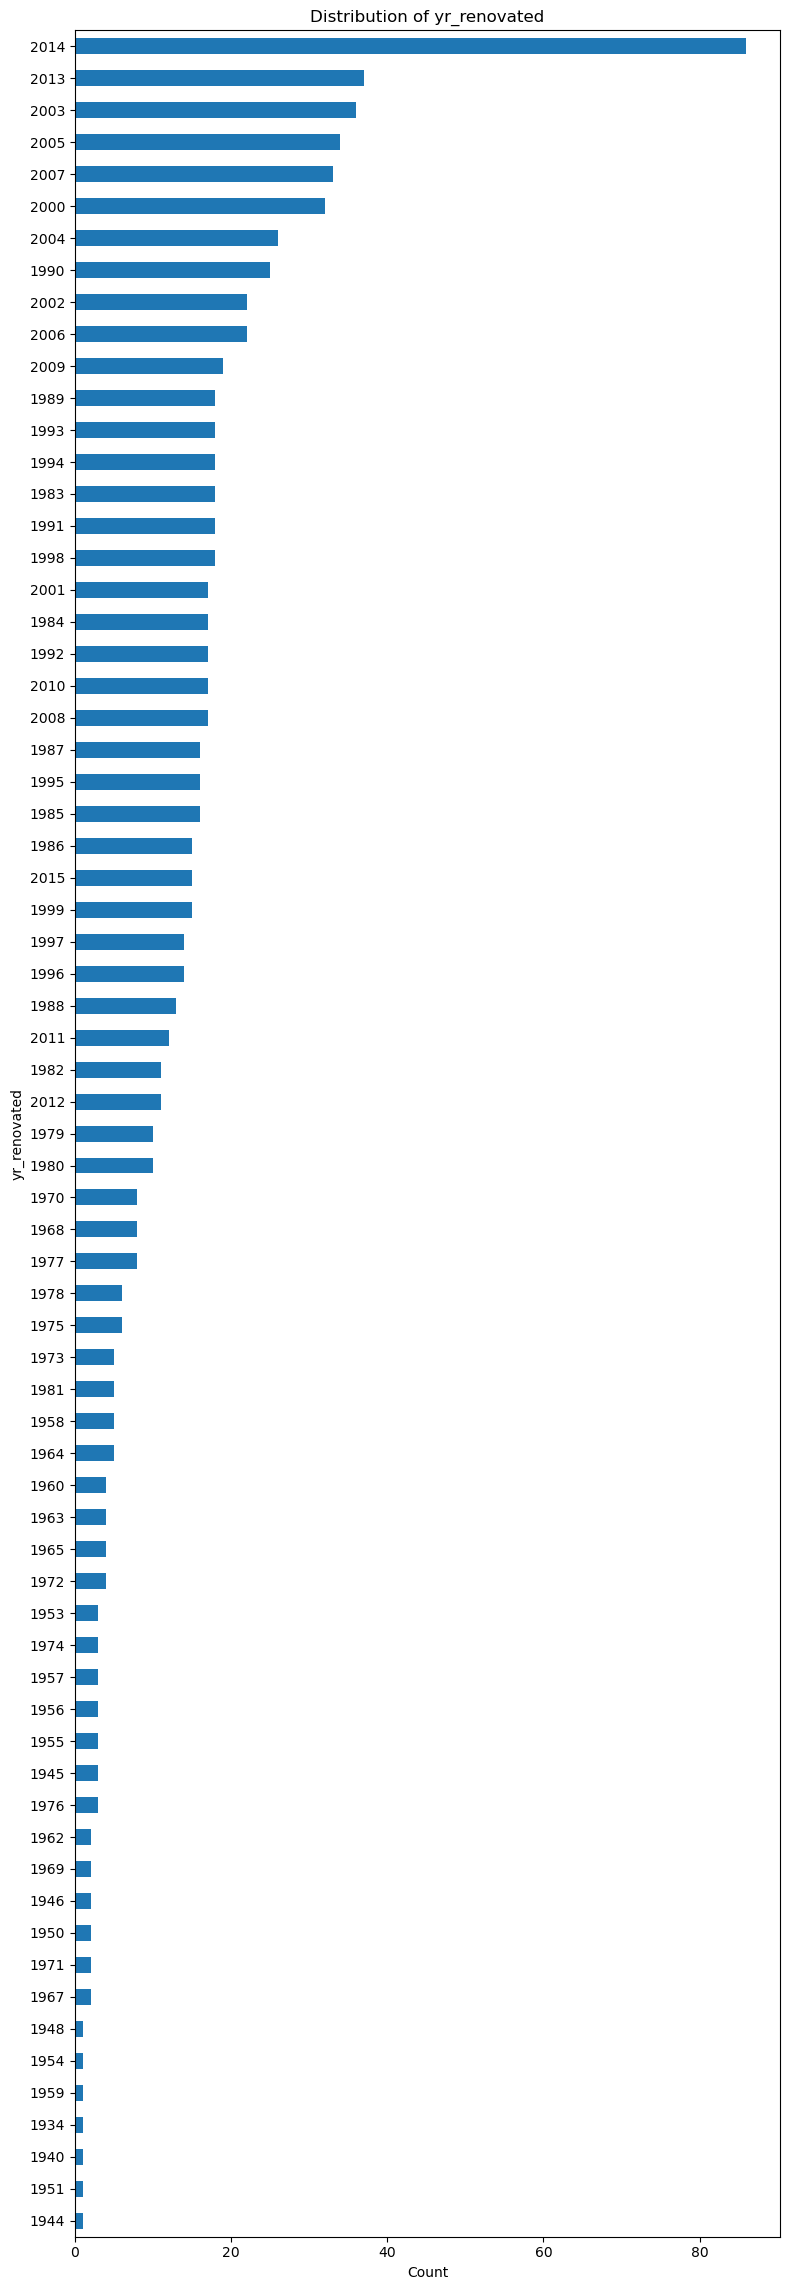

Analysis for column: zipcode

Frequency counts:
zipcode
98103    567
98038    550
98115    547
98052    537
98117    530
        ... 
98109    100
98010     96
98024     77
98148     53
98039     48
Name: count, Length: 70, dtype: int64
Mode: [98103]

Unique categories: 70



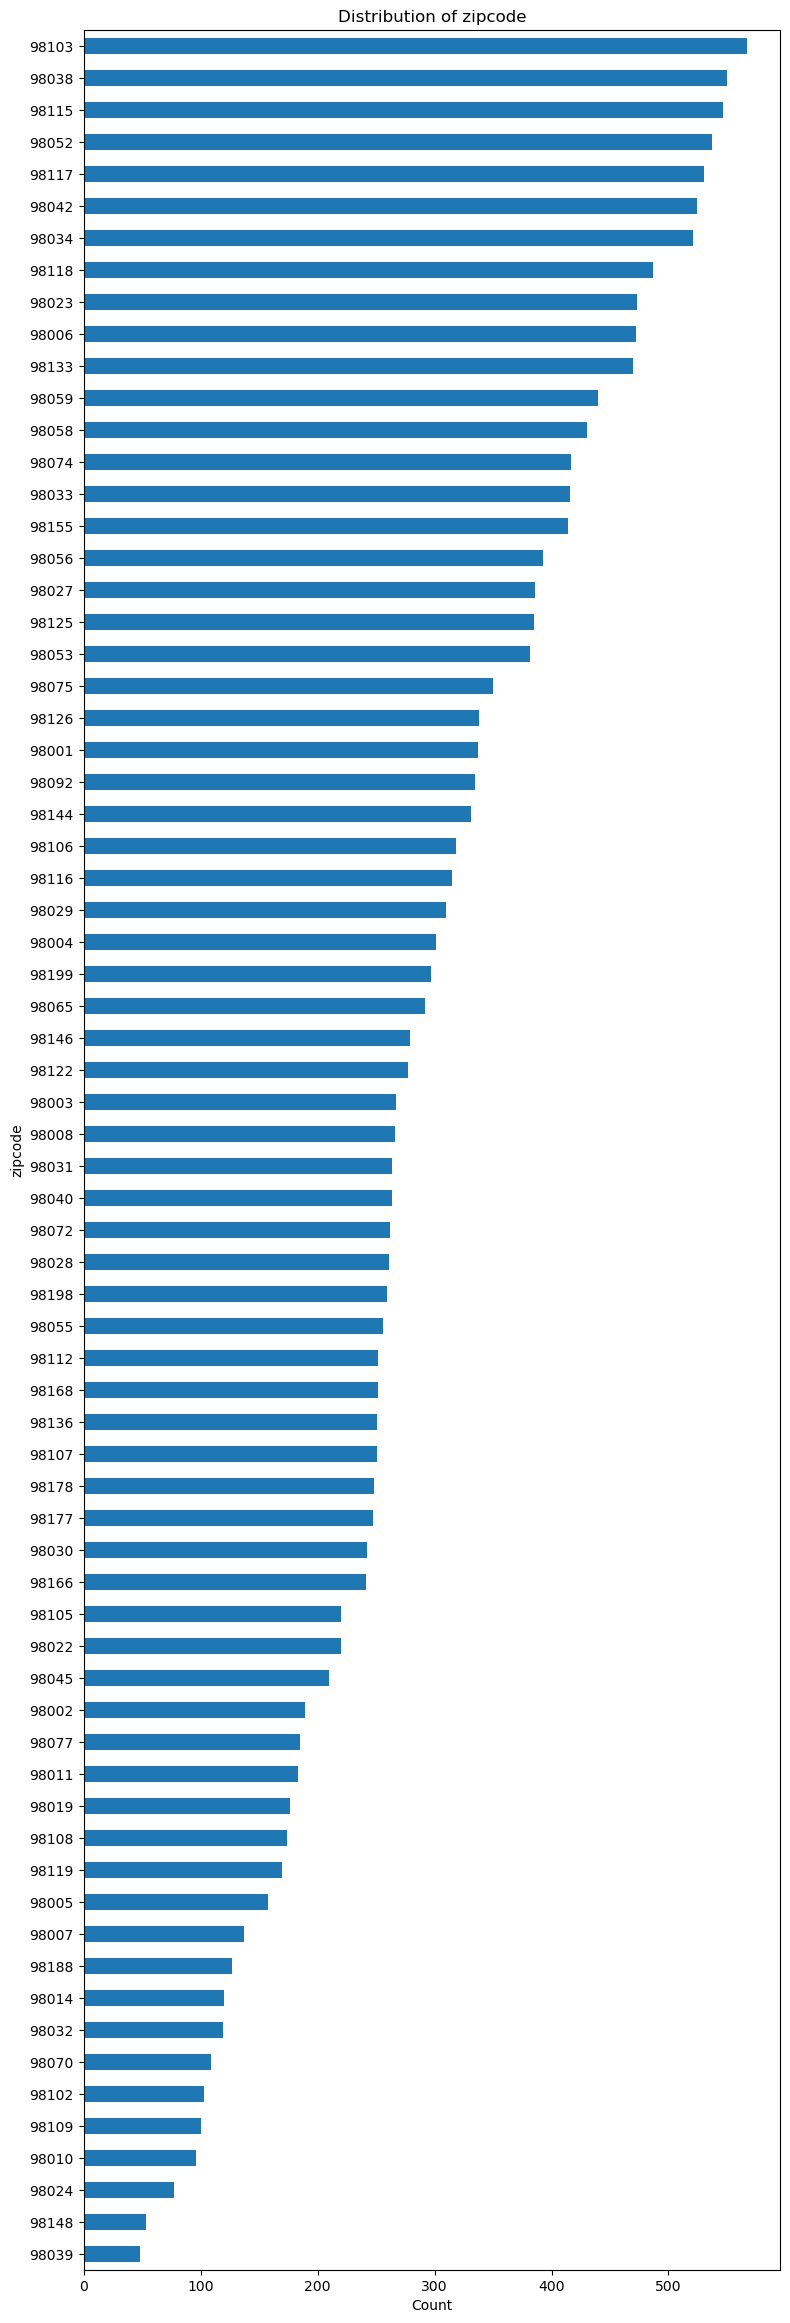

In [45]:
for col in categorical_cols:
        categorical_summary(houses, col)

This summary demonstrates that there are popular zipcodes that more houses sell in, possibly new developments or subdivisions. This coincides with the large number of new builds that were sold, as the largest group were built in 2014. Although most sold houses were not renovated, of those that were, the majority were renovated in 2014, possibly to increase desireability to new owners. Since we know these sales took place between May 2014-2015, that distribution is less valuable, but a particularly interesting one from a behavioural standpoint is the month sold. Most houses were sold between April and August, possibly indicating a consumer preference to move during spring and summer months.

Summary statistics for ordinal data:

Analysis for condition:
Frequency counts:
condition
1       26
2      167
3    13279
4     5383
5     1623
Name: count, dtype: int64

Median: 3.0
Mode: [3]

25th, 50th, 75th percentiles:
0.25    3.0
0.50    3.0
0.75    4.0
Name: condition, dtype: float64


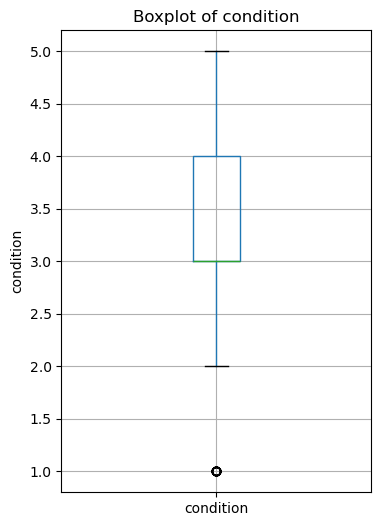

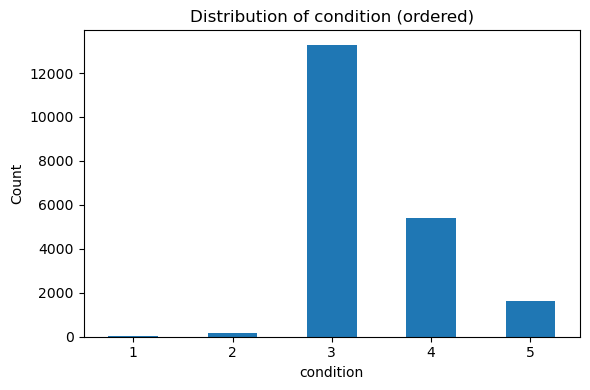

In [46]:
def ordinal_summary(df, column = 'condition'):
    print('Analysis for condition:')
    
    freq = df[column].value_counts().sort_index()
    print('Frequency counts:')
    print(freq)
    
    median = df[column].median()
    mode = df[column].mode()
    print(f'\nMedian: {median}')
    print(f'Mode: {mode.tolist()}')
 
    quantiles = df[column].quantile([0.25, 0.5, 0.75])
    print('\n25th, 50th, 75th percentiles:')
    print(quantiles)
    
    plt.figure(figsize=(4,6))
    df.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.xticks(rotation=0)
    plt.show()
    
    freq.plot(kind='bar', figsize=(6,4))
    plt.title(f'Distribution of {column} (ordered)')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

ordinal_summary(houses)

The condition rating of a property describes the amount of wear and tear a property may have, and quantifies the amount of maintenance done, if there is any physical depreciation, and the need for repairs. A grade of 1 is acheivable only by new builds, 3 describes an adequately maintained property, 5 is not well maintained, but is functional with no safety concerns. A grade of 6 exists, but since it is for damaged properties, it is logical that it does not occur on a sales report (Mick, 2024). Although this dataset does contain several houses that are new builds, here they are an outlier. Most houses are generally well-maintained, with some falling to adequate condition, and less in the un-maintained category.

## Correlations

The dependent variable is price, as it is outcome that we would want to predict, based on the other variables. All other variables describe the house and so influence the price. 

In [47]:
# Finding numeric correlations
corr_matrix = houses[numeric_cols].corr()
numeric_corr = corr_matrix['price'].sort_values(ascending=False)
numeric_corr

price            1.000000
sqft_living      0.683272
grade            0.668610
sqft_above       0.607758
sqft_living15    0.586698
bathrooms        0.515876
sqft_basement    0.323294
bedrooms         0.318380
lat              0.306357
floors           0.258377
sqft_lot         0.084341
sqft_lot15       0.080499
long             0.021146
Name: price, dtype: float64

The variables with the strongest correlation are sqft_living and grade. It is interesting that grade has such a strong relationship, but areas with higher priced houses might have better views than more affordable houses. Like sqft_living, sqft_above and sqft_living15 also have reasonably strong correlations, but this is likely due to multicolinearity. The number of bathrooms is also moderately correlated with price, which is unsurprising as more bathrooms should add to the property value.

In [48]:
# Finding categorical correlations
def chi_square(freq):
    total = freq.to_numpy().sum()
    expected = (freq.sum(axis=1).to_numpy().reshape(-1,1) *
                freq.sum(axis=0).to_numpy().reshape(1,-1)) / total
    chi2 = ((freq.to_numpy() - expected)**2 / expected).sum()
    return chi2
    
def categorical_corr(houses, categorical_cols, numeric_cols, bins=4):

    price_category = f'{numeric_cols}_category'
    houses[price_category] = pd.cut(houses[numeric_cols], bins=bins, labels=False)
    results = {}

    for col in categorical_cols:
        freq = pd.crosstab(houses[col], houses[price_category])
        chi2 = chi_square(freq)
        results[col] = chi2
    
    results_series = pd.Series(results)
    return results_series

categorical_cols = ['zipcode', 'yr_built', 'yr_renovated', 'year_sold', 'month_sold']
chi_results = categorical_corr(houses, categorical_cols, 'price', bins=4)
chi_results.round(2)

zipcode         2039.38
yr_built         396.14
yr_renovated    1127.30
year_sold          1.57
month_sold        27.46
dtype: float64

Zipcode is very strongly associated with house price, demonstrating that location is the most important factor. Yr_renotaved is also strongly associated, indicating that renovated houses tend to be more expensive. Yr_built has a moderate association, indicating that newer houses also tend to have higher prices.

In [49]:
# Finding ordinal correlation
subset = houses[['condition', 'price']].copy()

subset['condition_rank'] = subset['condition'].rank()
subset['price_rank'] = subset['price'].rank()

ordinal_corr = subset['condition_rank'].corr(subset['price_rank'])
ordinal_corr.round(4)

np.float64(0.0187)

There is almost no relationship between condition and price, and houses in better condition do not consistently sell for higher prices.

## Exploratory analysis

Numeric exploratory analysis

bedrooms
3.0     45.35%
4.0     31.83%
2.0     12.78%
5.0      7.52%
6.0      1.28%
1.0      0.92%
7.0      0.17%
8.0      0.06%
0.0      0.05%
9.0      0.02%
10.0     0.01%
Name: proportion, dtype: object


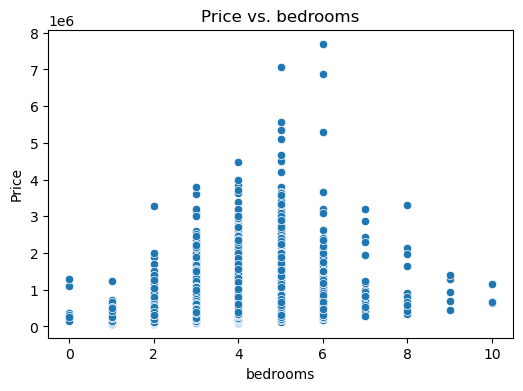

bathrooms
2.50     23.7%
1.00    17.02%
2.25    13.98%
1.75    13.43%
2.00     8.39%
1.50     6.37%
2.75     5.21%
3.00     3.34%
3.50     3.13%
3.25     2.55%
3.75      0.7%
4.00      0.6%
4.50     0.44%
4.25     0.36%
0.75     0.32%
4.75     0.11%
5.00     0.09%
5.25     0.05%
5.50     0.05%
1.25     0.03%
0.00     0.03%
6.00     0.02%
0.50     0.02%
5.75     0.01%
6.25     0.01%
6.50     0.01%
8.00      0.0%
6.75      0.0%
7.50      0.0%
7.75      0.0%
Name: proportion, dtype: object


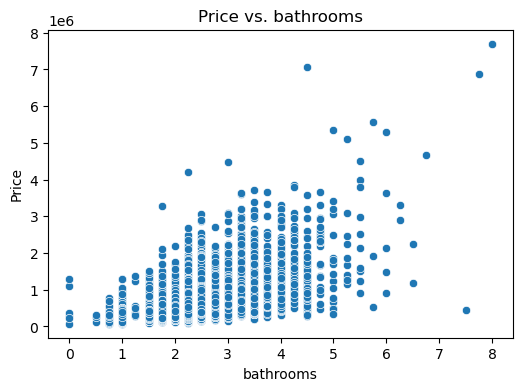

sqft_living
1920.0    5.45%
1440.0    0.61%
1300.0    0.61%
1400.0     0.6%
1800.0    0.58%
          ...  
2507.0     0.0%
5720.0     0.0%
2216.0     0.0%
2497.0     0.0%
1425.0     0.0%
Name: proportion, Length: 993, dtype: object


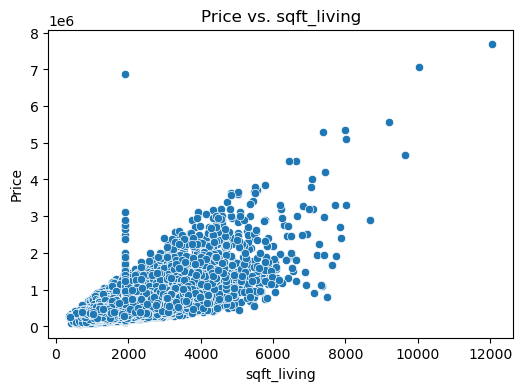

sqft_lot
7620.0     4.93%
5000.0     1.57%
6000.0     1.26%
4000.0      1.1%
7200.0     0.99%
           ...  
14190.0     0.0%
9005.0      0.0%
9503.0      0.0%
36831.0     0.0%
1076.0      0.0%
Name: proportion, Length: 9125, dtype: object


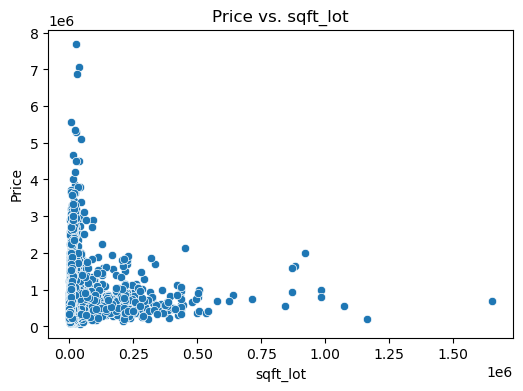

floors
1.0    49.37%
2.0    38.26%
1.5     8.83%
3.0     2.75%
2.5     0.76%
3.5     0.03%
Name: proportion, dtype: object


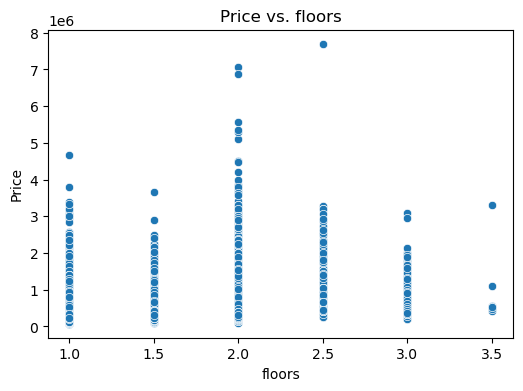

grade
7     41.49%
8     28.18%
9     11.98%
6      9.46%
10     5.26%
11     1.88%
5      1.12%
12     0.42%
4      0.13%
13     0.06%
3      0.01%
Name: proportion, dtype: object


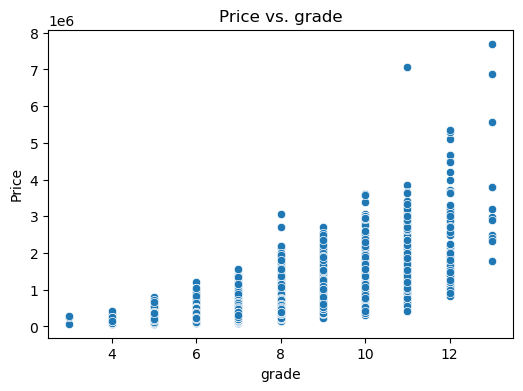

sqft_above
1300    0.99%
1010    0.98%
1200    0.98%
1220    0.88%
1140    0.86%
        ...  
3674     0.0%
2979     0.0%
2382     0.0%
6290     0.0%
1425     0.0%
Name: proportion, Length: 921, dtype: object


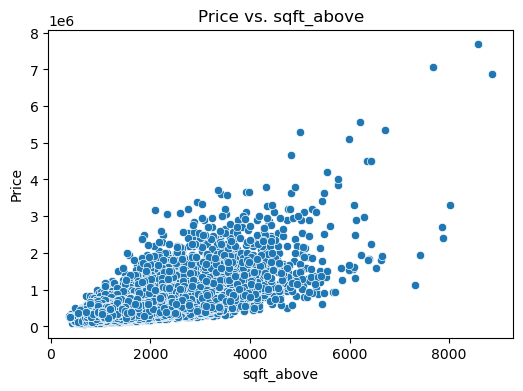

sqft_basement
0      60.78%
700     1.03%
600     0.99%
500     0.97%
800     0.95%
        ...  
518      0.0%
374      0.0%
784      0.0%
475      0.0%
248      0.0%
Name: proportion, Length: 303, dtype: object


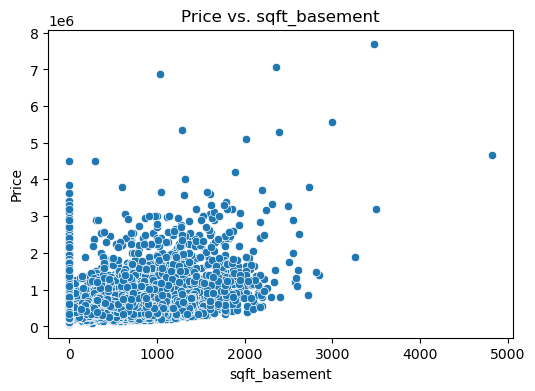

lat
47.5491    0.08%
47.6846    0.08%
47.6955    0.08%
47.6624    0.08%
47.6886    0.08%
           ...  
47.3242     0.0%
47.1803     0.0%
47.2080     0.0%
47.4981     0.0%
47.6502     0.0%
Name: proportion, Length: 4987, dtype: object


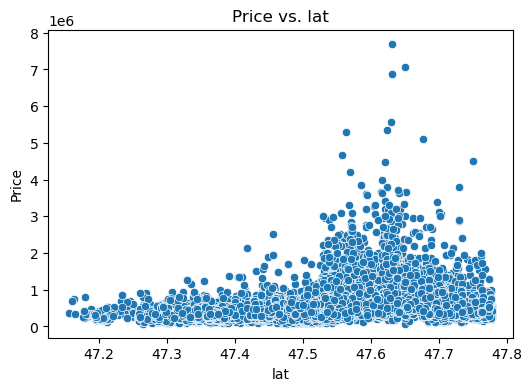

long
-122.290    0.54%
-122.300    0.53%
-122.362    0.49%
-122.372    0.47%
-122.172    0.46%
            ...  
-122.441     0.0%
-121.931     0.0%
-121.473     0.0%
-121.743     0.0%
-121.403     0.0%
Name: proportion, Length: 746, dtype: object


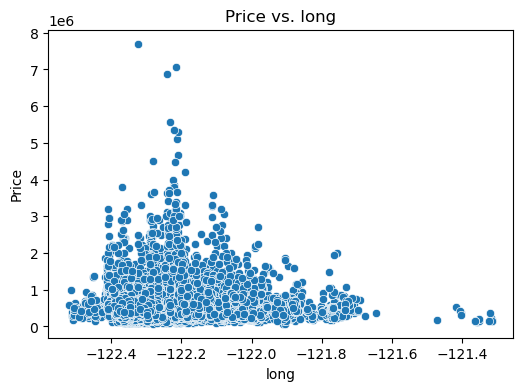

sqft_living15
1540    0.93%
1440    0.91%
1560    0.86%
1500    0.83%
1580    0.79%
        ...  
6110     0.0%
2175     0.0%
4570     0.0%
1834     0.0%
2927     0.0%
Name: proportion, Length: 761, dtype: object


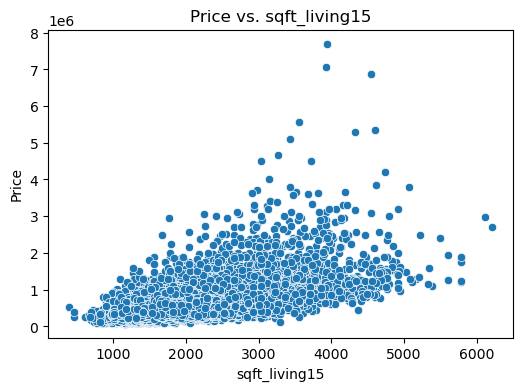

sqft_lot15
5000     1.96%
4000     1.65%
6000     1.33%
7200     0.98%
7500     0.67%
         ...  
9260      0.0%
10049     0.0%
9128      0.0%
6963      0.0%
2007      0.0%
Name: proportion, Length: 8426, dtype: object


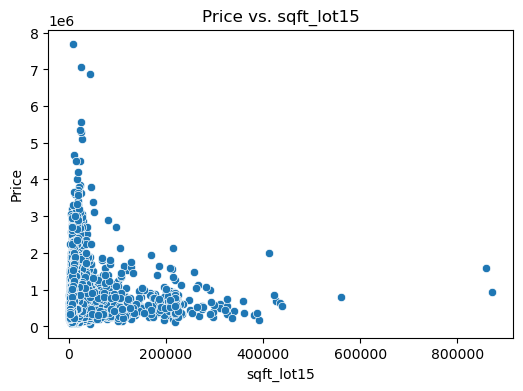

In [63]:
for col in numeric_cols:
    if col == 'price':
        continue
    prop = houses[col].value_counts(normalize=True) * 100
    print(prop.round(2).astype(str) + '%')
        
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y='price', data=houses)
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

Categorical exploratory analysis

zipcode
98103    2.77%
98038    2.69%
98115    2.67%
98052    2.62%
98117    2.59%
         ...  
98109    0.49%
98010    0.47%
98024    0.38%
98148    0.26%
98039    0.23%
Name: proportion, Length: 70, dtype: object
yr_built
2014    2.55%
2006     2.1%
2005    2.07%
2004    1.99%
2003    1.96%
        ...  
1933    0.15%
1901    0.14%
1902    0.13%
1935    0.11%
1934     0.1%
Name: proportion, Length: 116, dtype: object
yr_renovated
0       95.78%
2014     0.42%
2013     0.18%
2003     0.18%
2005     0.17%
         ...  
1948      0.0%
1959      0.0%
1954      0.0%
1934      0.0%
1944      0.0%
Name: proportion, Length: 70, dtype: object
year_sold
2014    67.72%
2015    32.28%
Name: proportion, dtype: object
month_sold
5     11.15%
4     10.32%
7     10.24%
6      10.1%
8      9.05%
3      8.65%
10     8.61%
9      8.23%
12      6.8%
11     6.52%
2       5.8%
1      4.53%
Name: proportion, dtype: object


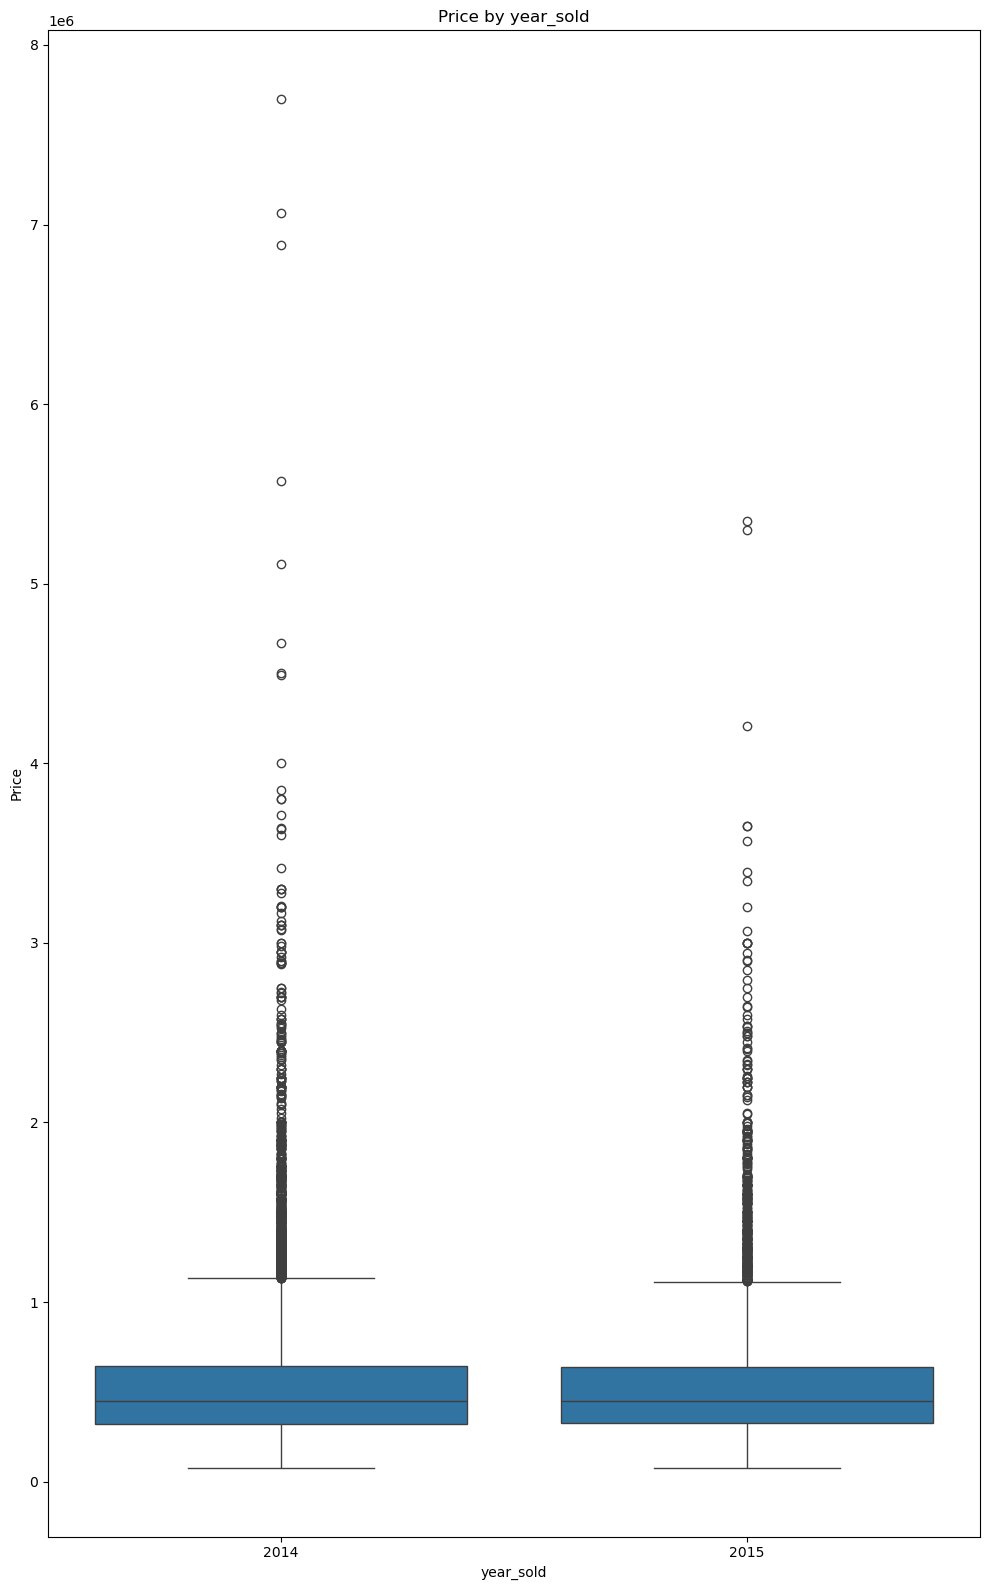

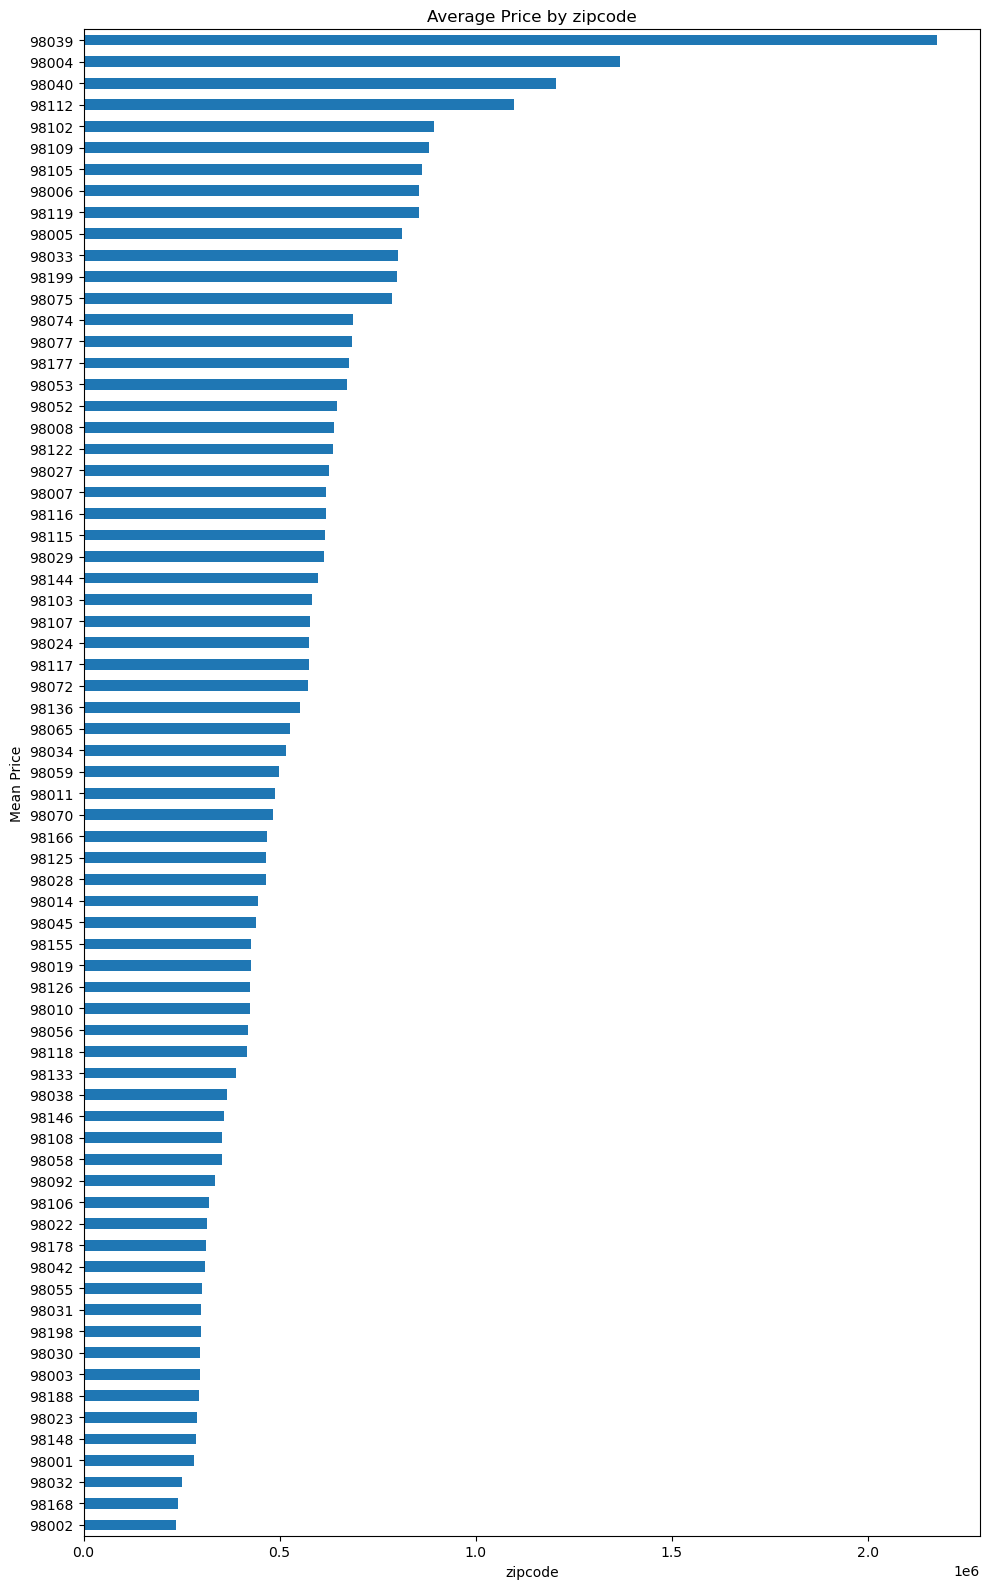

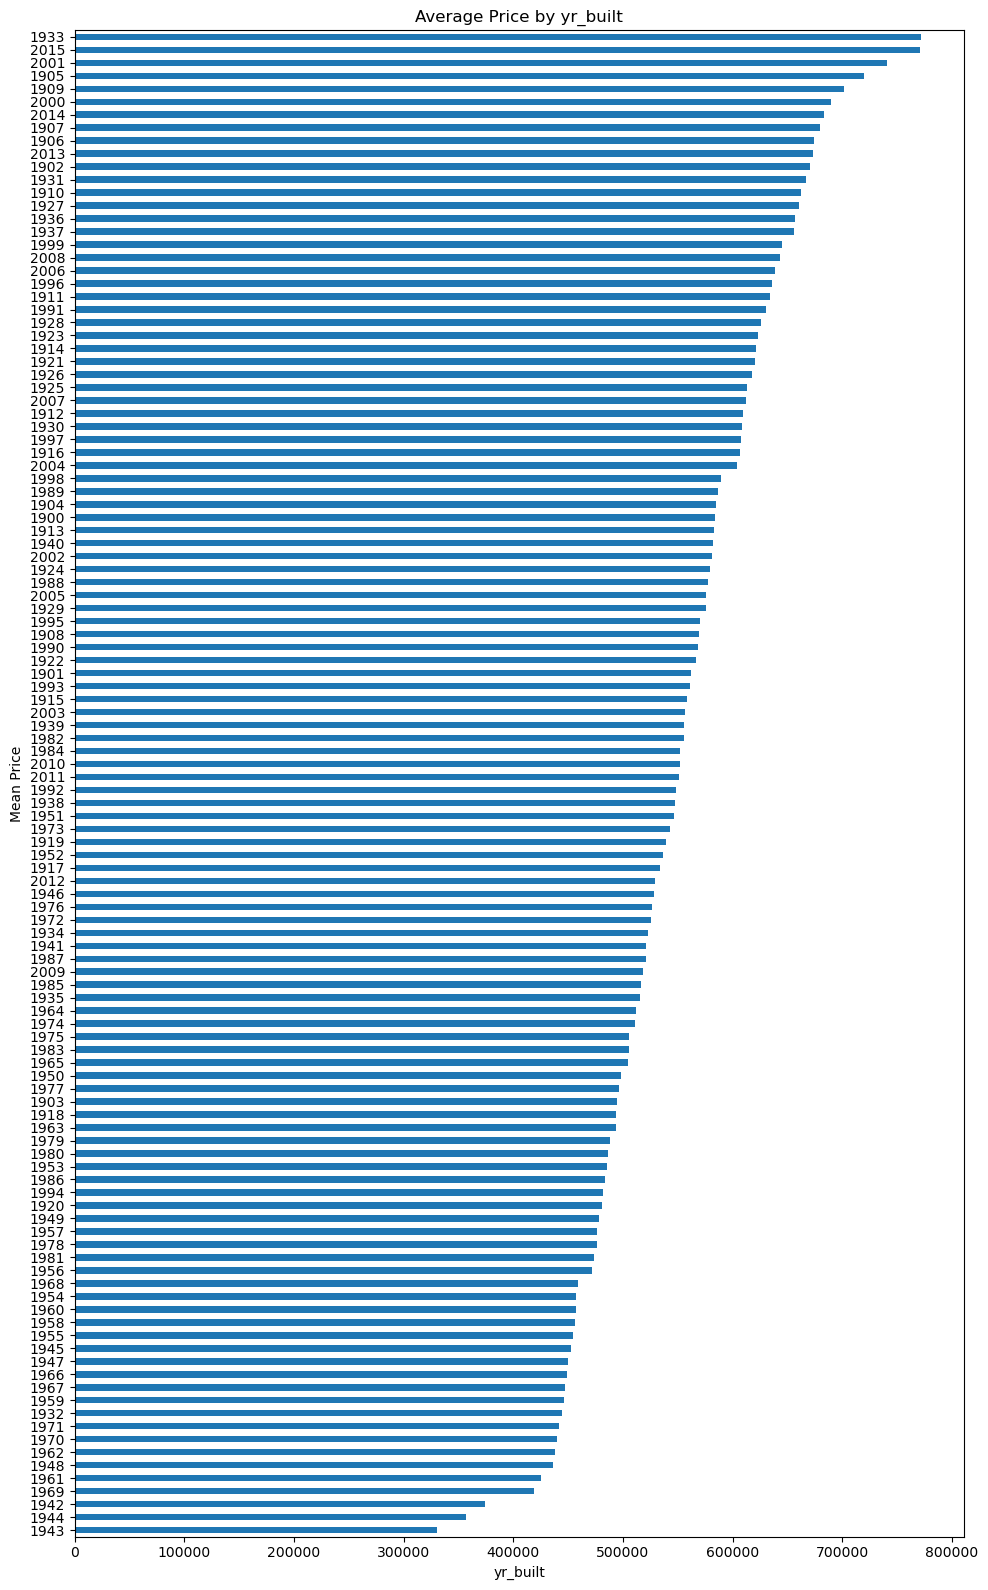

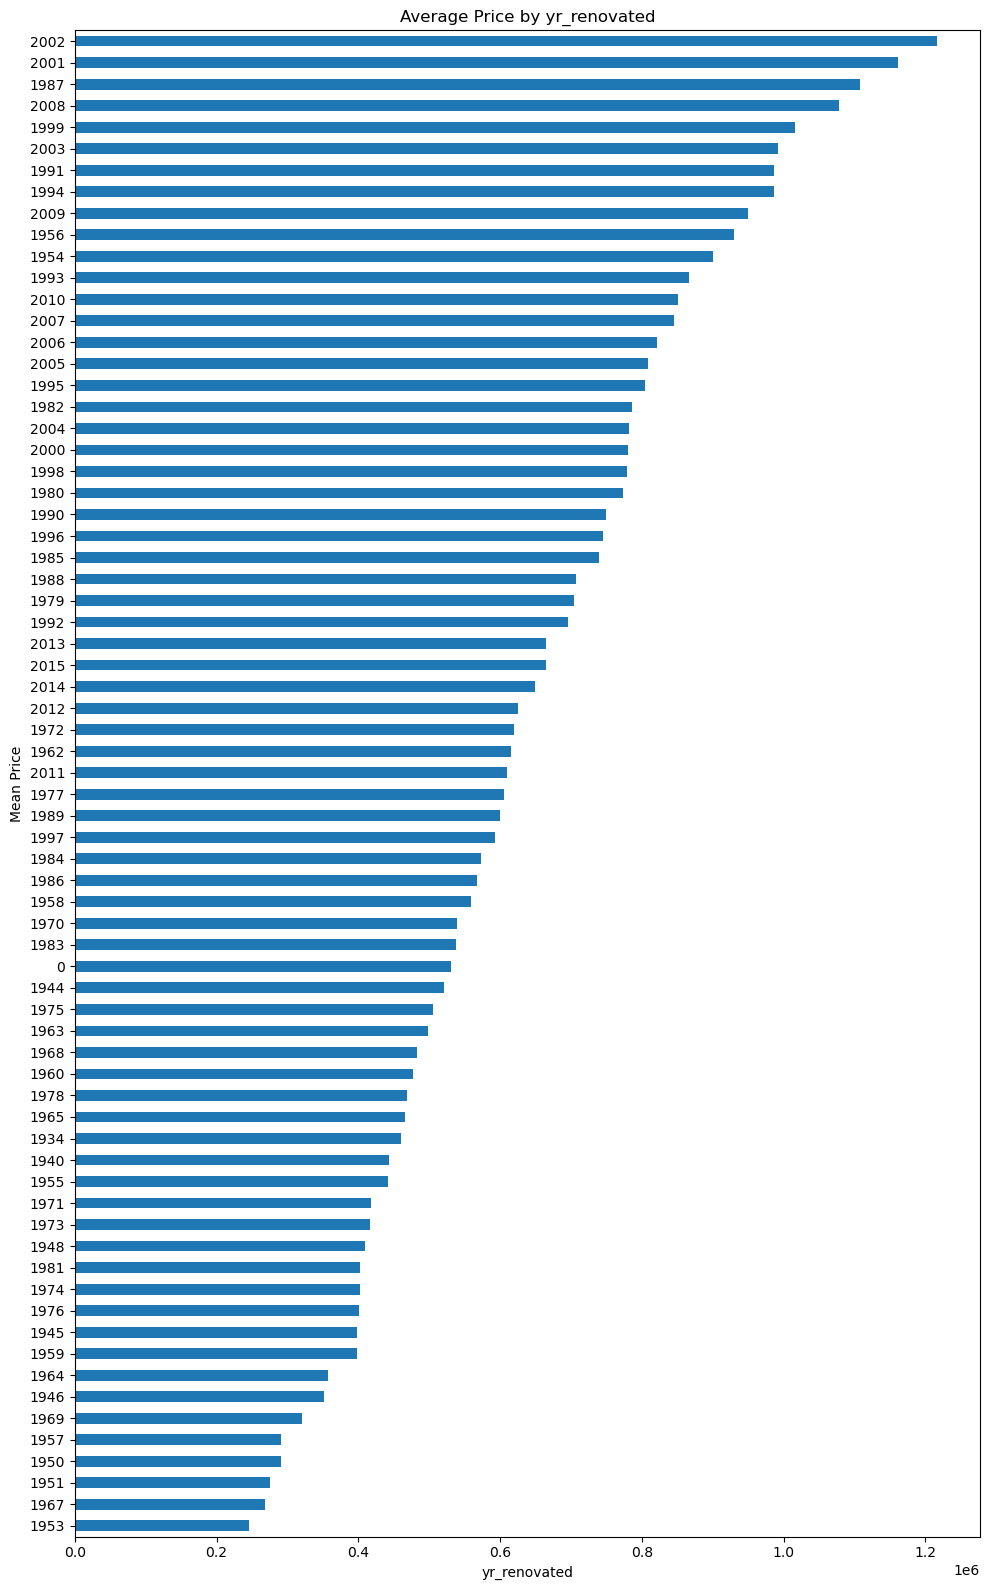

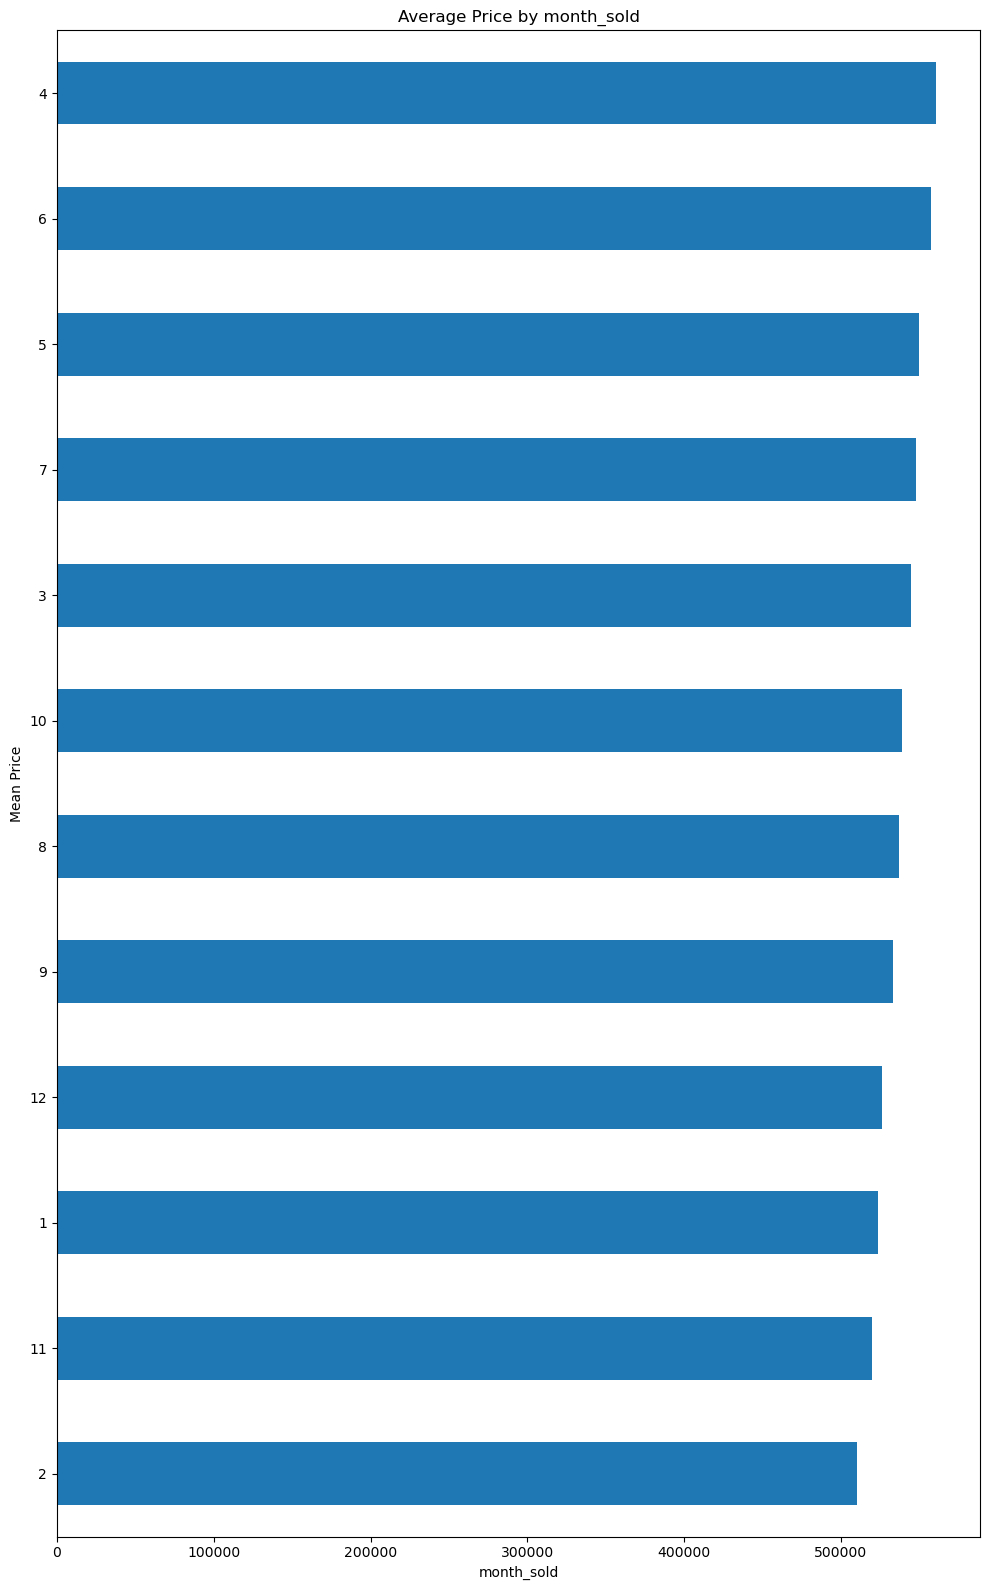

In [62]:
for col in categorical_cols:
    prop = houses[col].value_counts(normalize=True) * 100
    print(prop.round(2).astype(str) + '%')

# Splitting the varibles into two categories by cardinality, to avoid overwhelming visuals
low_card = [c for c in categorical_cols if houses[c].nunique() <= 10]   
high_card = [c for c in categorical_cols if houses[c].nunique() > 10]   

for col in low_card:
    plt.figure(figsize=(10,16))
    sns.boxplot(x=col, y='price', data=houses)
    plt.title(f'Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

for col in high_card:
    mean_price = houses.groupby(col)['price'].mean().sort_values()
    plt.figure(figsize=(10,16))
    mean_price.plot(kind='barh')
    plt.title(f'Average Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Mean Price')
    plt.tight_layout()
    plt.show()

Ordinal exploratory analysis

condition
1     0.13%
2     0.82%
3    64.85%
4    26.29%
5     7.93%
Name: proportion, dtype: object


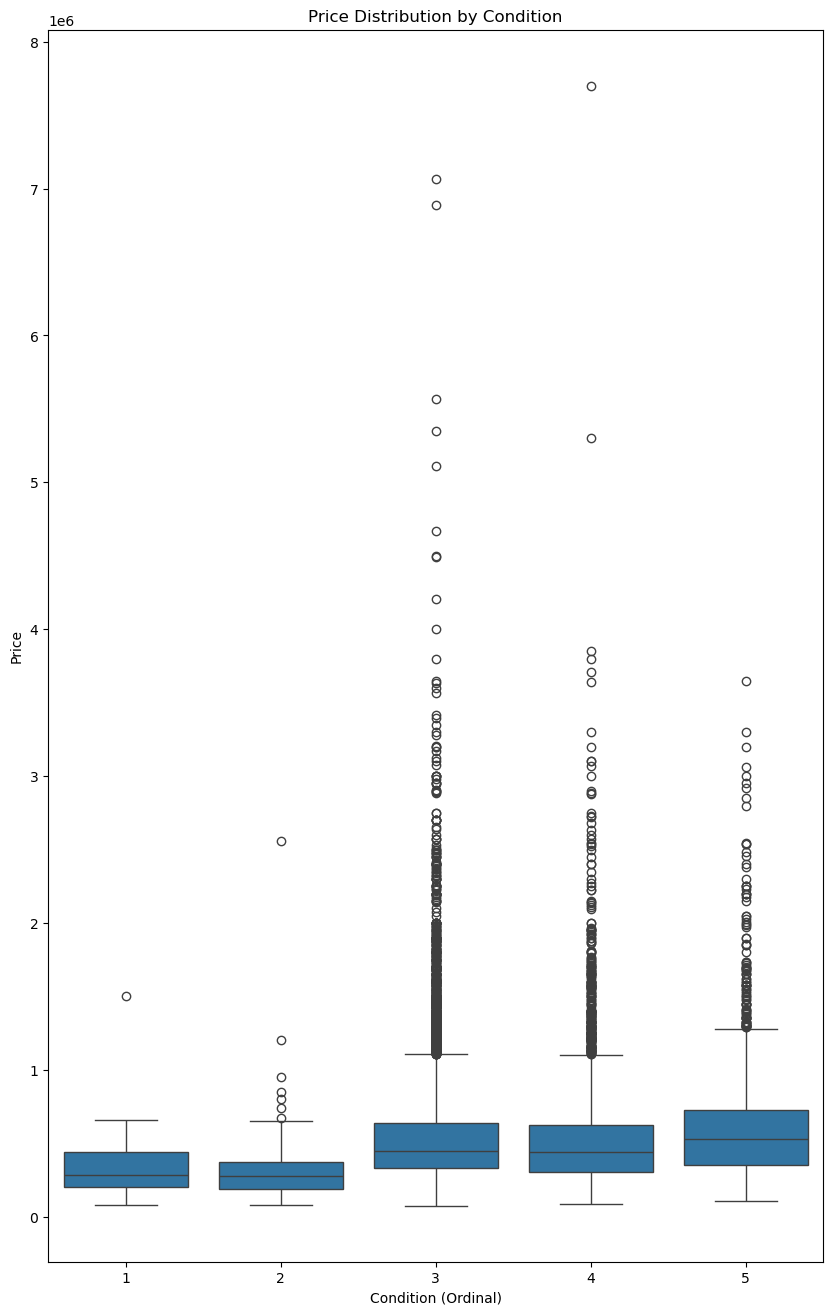

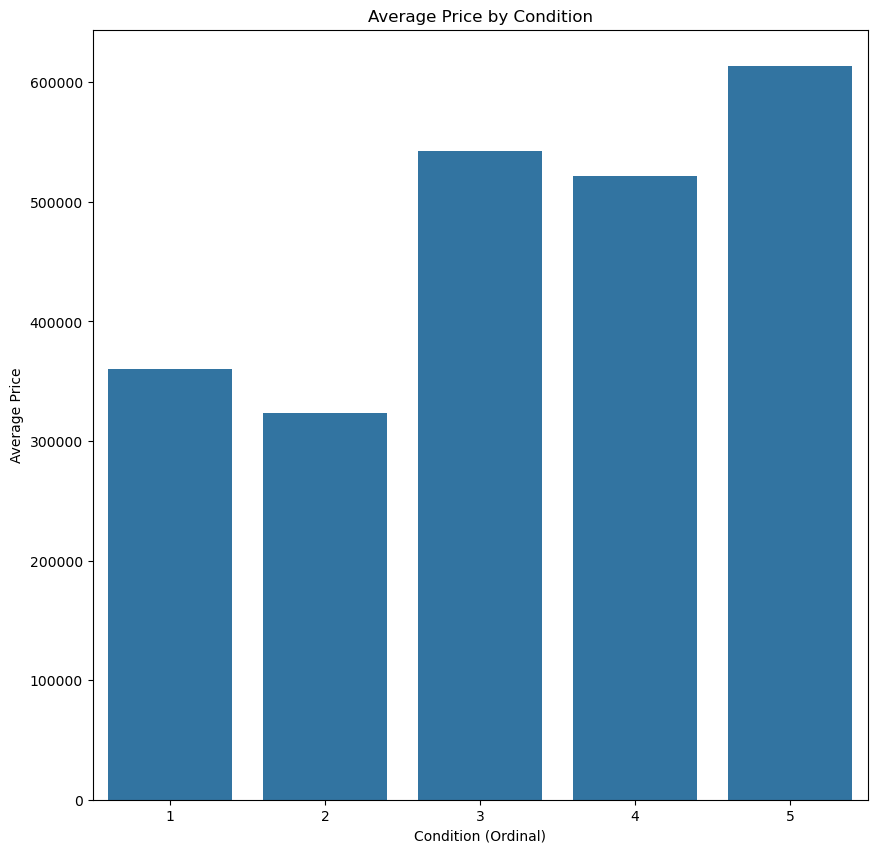

In [66]:
col = 'condition'
prop = houses[col].value_counts(normalize=True).sort_index() * 100
print(prop.round(2).astype(str) + "%")

plt.figure(figsize=(10, 16))
sns.boxplot(x='condition', y='price', data=houses)
plt.title("Price Distribution by Condition")
plt.xlabel("Condition (Ordinal)")
plt.ylabel("Price")
plt.show()

condition_means = houses.groupby('condition')['price'].mean().reset_index()
plt.figure(figsize=(10, 10))
sns.barplot(x='condition', y='price', data=condition_means)
plt.title("Average Price by Condition")
plt.xlabel("Condition (Ordinal)")
plt.ylabel("Average Price")
plt.show()


## References

Mick, C. (2024, January 19). Understanding appraisal condition ratings (C1 to C6). McKissock Learning. https://www.mckissock.com/blog/appraisal/understanding-appraisal-condition-ratings-c1-to-c6
